# Part 2

### 2.1 Dataset Description

The dataset that is going to be used for this project features stock market information for four companies, Apple, Microsoft, Netflix and Google. It features a three month data range where every open market day has the companies open, close, high, low, and adjusted close stock price for the period. It also features the volume of trades for that day(how many shares are traded). This is public data which can be found by exploring pretty much any finance site as all of these numbers are public knowledge and checked across multiple platforms. This dataset was last updated in May and therefore features data from February 7th to May 5th of 2023. Given this dataset the plan is to determine the expected adjusted close stock price for one company Google. We will create a model to determine this value given the opening price, highs, lows, and volume traded for both Google and also the other three companies as their is expected to be correlation due to being in the same industry. It would be more beneficial to have a wider range of dates for this model, however this range should be enough to create a valid model to determine expected stock closing price.

# Part 3

### 3.1 Data cleaning

In [1]:
import pandas as pd

In [2]:
from zipfile import ZipFile

In [3]:
with ZipFile('stock_market_performance.zip', 'r') as zObject:
    zObject.extractall()

In [4]:
data_df = pd.read_csv("stocks.csv")

In [5]:
data_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [6]:
data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [8]:
data_df['Ticker'].isnull().sum()

0

In [9]:
data_df['Date'].isnull().sum()

0

In [10]:
data_df['Open'].isnull().sum()

0

In [11]:
data_df['Close'].isnull().sum()

0

In [12]:
data_df['High'].isnull().sum()

0

In [13]:
data_df['Low'].isnull().sum()

0

In [14]:
data_df['Adj Close'].isnull().sum()

0

In [15]:
data_df['Volume'].isnull().sum()

0

There are no null values, and it seems as if the datatypes are all as expected

### 3.2 Outlier Detection

In [16]:
from scipy import stats

In [17]:
import numpy as np

In [18]:
apple_df = data_df[data_df['Ticker']=='AAPL'].copy()
apple_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
57,AAPL,2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
58,AAPL,2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
59,AAPL,2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000
60,AAPL,2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400


In [19]:
data_df['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [20]:
msft_df = data_df[data_df['Ticker']=='MSFT'].reset_index(drop=True).copy()
msft_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,MSFT,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400
1,MSFT,2023-02-08,273.200012,276.760010,266.209991,266.730011,266.063599,54686000
2,MSFT,2023-02-09,273.799988,273.980011,262.799988,263.619995,262.961365,42375100
3,MSFT,2023-02-10,261.529999,264.089996,260.660004,263.100006,262.442657,25818500
4,MSFT,2023-02-13,267.640015,274.600006,267.149994,271.320007,270.642120,44630900
...,...,...,...,...,...,...,...,...
57,MSFT,2023-05-01,306.970001,308.600006,305.149994,305.559998,305.559998,21294100
58,MSFT,2023-05-02,307.760010,309.179993,303.910004,305.410004,305.410004,26404400
59,MSFT,2023-05-03,306.619995,308.609985,304.089996,304.399994,304.399994,22360800
60,MSFT,2023-05-04,306.239990,307.760010,303.399994,305.410004,305.410004,22519900


In [21]:
nflx_df = data_df[data_df['Ticker']=='NFLX'].reset_index(drop=True).copy()
nflx_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,NFLX,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
1,NFLX,2023-02-08,360.019989,368.190002,358.309998,366.829987,366.829987,6253200
2,NFLX,2023-02-09,372.410004,373.829987,361.739990,362.500000,362.500000,6901100
3,NFLX,2023-02-10,359.160004,362.140015,347.140015,347.359985,347.359985,7291100
4,NFLX,2023-02-13,349.500000,359.700012,344.250000,358.570007,358.570007,7134400
...,...,...,...,...,...,...,...,...
57,NFLX,2023-05-01,329.440002,331.230011,318.089996,324.119995,324.119995,5341500
58,NFLX,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600
59,NFLX,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100
60,NFLX,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700


In [22]:
goog_df = data_df[data_df['Ticker']=='GOOG'].reset_index(drop=True).copy()
goog_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
1,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000
2,GOOG,2023-02-09,100.540001,100.610001,93.860001,95.459999,95.459999,97798600
3,GOOG,2023-02-10,95.739998,97.019997,94.529999,94.860001,94.860001,49325300
4,GOOG,2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600
...,...,...,...,...,...,...,...,...
57,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
58,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
59,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
60,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [23]:
import seaborn as sns

<AxesSubplot:>

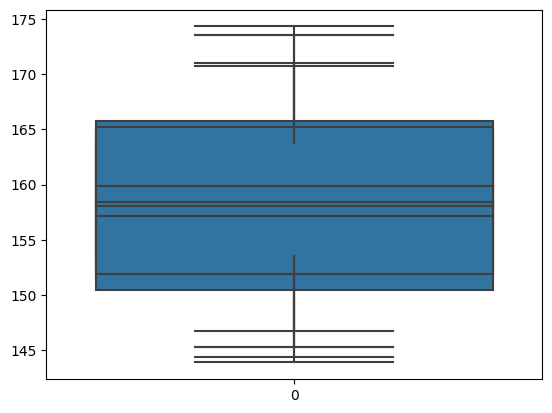

In [24]:
sns.boxplot(apple_df['Open'])
sns.boxplot(apple_df['Close'])
sns.boxplot(apple_df['High'])
sns.boxplot(apple_df['Low'])
sns.boxplot(apple_df['Adj Close'])

<AxesSubplot:>

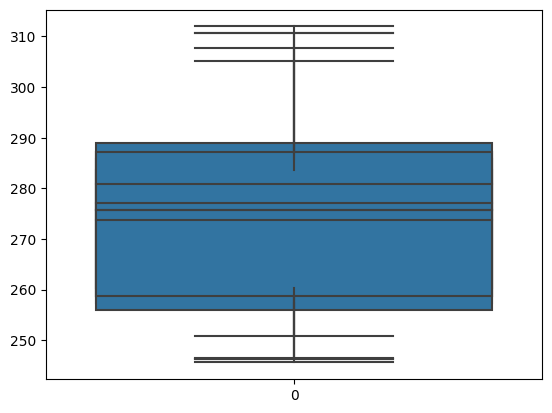

In [25]:
sns.boxplot(msft_df['Open'])
sns.boxplot(msft_df['Close'])
sns.boxplot(msft_df['High'])
sns.boxplot(msft_df['Low'])
sns.boxplot(msft_df['Adj Close'])

<AxesSubplot:>

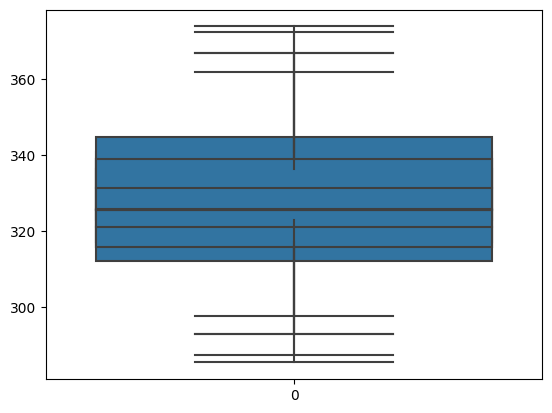

In [26]:
sns.boxplot(nflx_df['Open'])
sns.boxplot(nflx_df['Close'])
sns.boxplot(nflx_df['High'])
sns.boxplot(nflx_df['Low'])
sns.boxplot(nflx_df['Adj Close'])

<AxesSubplot:>

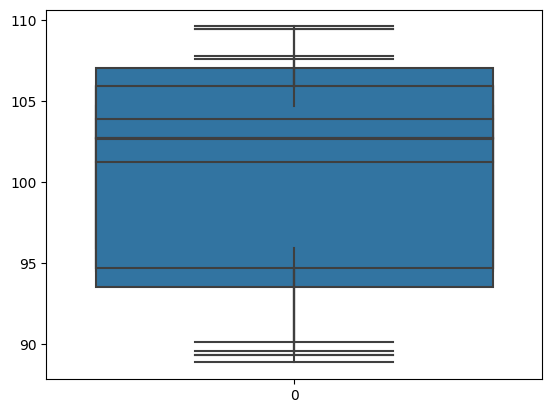

In [27]:
sns.boxplot(goog_df['Open'])
sns.boxplot(goog_df['Close'])
sns.boxplot(goog_df['High'])
sns.boxplot(goog_df['Low'])
sns.boxplot(goog_df['Adj Close'])

### 3.3 Data Quality and Consistency

In [28]:
msft_df['Date'].nunique()

62

In [29]:
apple_df['Date'].nunique()

62

In [30]:
nflx_df['Date'].nunique()

62

In [31]:
goog_df['Date'].nunique()

62

In [32]:
data_df['Date'].nunique()

62

In [33]:
data_df[data_df['Open']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


In [34]:
data_df[data_df['Close']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


In [35]:
data_df[data_df['High']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


In [36]:
data_df[data_df['Low']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


In [37]:
data_df[data_df['Adj Close']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


In [38]:
data_df[data_df['Volume']<0]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume


### 3.4 Model Prep

In [39]:
features = ['Open', 'High', 'Low', 'Volume', 'AAPL Open', 'AAPL High', 'AAPL Low', 'AAPL Adj Close', 'AAPL Volume', \
            'MSFT Open', 'MSFT High', 'MSFT Low', 'MSFT Adj Close', 'MSFT Volume', \
           'NFLX Open', 'NFLX High', 'NFLX Low', 'NFLX Adj Close', 'NFLX Volume']
output = pd.DataFrame(data_df['Adj Close'])

In [40]:
apple_df.drop(['Ticker', 'Close', 'Date'], axis=1, inplace = True)
apple_df.rename({'Open':'AAPL Open', 'High':'AAPL High', 'Low':'AAPL Low', 'Adj Close':'AAPL Adj Close', 'Volume':'AAPL Volume'}, axis=1, inplace=True)
apple_df

,AAPL Open,AAPL High,AAPL Low,AAPL Adj Close,AAPL Volume
0,150.639999,155.229996,150.639999,154.414230,83322600
1,153.880005,154.580002,151.169998,151.688400,64120100
2,153.779999,154.330002,150.419998,150.639999,56007100
3,149.460007,151.339996,149.220001,151.009995,57450700
4,150.949997,154.259995,150.919998,153.850006,62199000
...,...,...,...,...,...
57,169.279999,170.449997,168.639999,169.589996,52472900
58,170.089996,170.350006,167.539993,168.539993,48425700
59,169.500000,170.919998,167.160004,167.449997,65136000
60,164.889999,167.039993,164.309998,165.789993,81235400


In [41]:
nflx_df.drop(['Ticker', 'Close', 'Date'], axis=1, inplace = True)
nflx_df.rename({'Open':'NFLX Open', 'High':'NFLX High', 'Low':'NFLX Low', 'Adj Close':'NFLX Adj Close', 'Volume':'NFLX Volume'}, axis=1, inplace=True)
nflx_df

,NFLX Open,NFLX High,NFLX Low,NFLX Adj Close,NFLX Volume
0,358.510010,364.179993,354.179993,362.950012,6289400
1,360.019989,368.190002,358.309998,366.829987,6253200
2,372.410004,373.829987,361.739990,362.500000,6901100
3,359.160004,362.140015,347.140015,347.359985,7291100
4,349.500000,359.700012,344.250000,358.570007,7134400
...,...,...,...,...,...
57,329.440002,331.230011,318.089996,324.119995,5341500
58,325.000000,326.070007,315.619995,317.549988,4318600
59,317.549988,324.619995,315.850006,319.299988,5064100
60,319.010010,323.609985,317.950012,320.779999,3879700


In [42]:
msft_df.drop(['Ticker', 'Close', 'Date'], axis=1, inplace = True)
msft_df.rename({'Open':'MSFT Open', 'High':'MSFT High', 'Low':'MSFT Low', 'Adj Close':'MSFT Adj Close', 'Volume':'MSFT Volume'}, axis=1, inplace=True)
msft_df

,MSFT Open,MSFT High,MSFT Low,MSFT Adj Close,MSFT Volume
0,260.529999,268.769989,260.079987,266.891510,50841400
1,273.200012,276.760010,266.209991,266.063599,54686000
2,273.799988,273.980011,262.799988,262.961365,42375100
3,261.529999,264.089996,260.660004,262.442657,25818500
4,267.640015,274.600006,267.149994,270.642120,44630900
...,...,...,...,...,...
57,306.970001,308.600006,305.149994,305.559998,21294100
58,307.760010,309.179993,303.910004,305.410004,26404400
59,306.619995,308.609985,304.089996,304.399994,22360800
60,306.239990,307.760010,303.399994,305.410004,22519900


In [43]:
comb_df = pd.concat([goog_df, apple_df, nflx_df, msft_df], axis=1)
comb_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,AAPL Open,AAPL High,...,NFLX Open,NFLX High,NFLX Low,NFLX Adj Close,NFLX Volume,MSFT Open,MSFT High,MSFT Low,MSFT Adj Close,MSFT Volume
0,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800,150.639999,155.229996,...,358.510010,364.179993,354.179993,362.950012,6289400,260.529999,268.769989,260.079987,266.891510,50841400
1,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000,153.880005,154.580002,...,360.019989,368.190002,358.309998,366.829987,6253200,273.200012,276.760010,266.209991,266.063599,54686000
2,GOOG,2023-02-09,100.540001,100.610001,93.860001,95.459999,95.459999,97798600,153.779999,154.330002,...,372.410004,373.829987,361.739990,362.500000,6901100,273.799988,273.980011,262.799988,262.961365,42375100
3,GOOG,2023-02-10,95.739998,97.019997,94.529999,94.860001,94.860001,49325300,149.460007,151.339996,...,359.160004,362.140015,347.140015,347.359985,7291100,261.529999,264.089996,260.660004,262.442657,25818500
4,GOOG,2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600,150.949997,154.259995,...,349.500000,359.700012,344.250000,358.570007,7134400,267.640015,274.600006,267.149994,270.642120,44630900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300,169.279999,170.449997,...,329.440002,331.230011,318.089996,324.119995,5341500,306.970001,308.600006,305.149994,305.559998,21294100
58,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100,170.089996,170.350006,...,325.000000,326.070007,315.619995,317.549988,4318600,307.760010,309.179993,303.910004,305.410004,26404400
59,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300,169.500000,170.919998,...,317.549988,324.619995,315.850006,319.299988,5064100,306.619995,308.609985,304.089996,304.399994,22360800
60,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,164.889999,167.039993,...,319.010010,323.609985,317.950012,320.779999,3879700,306.239990,307.760010,303.399994,305.410004,22519900


In [44]:
comb_df.isnull().sum()

Ticker            0
Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
AAPL Open         0
AAPL High         0
AAPL Low          0
AAPL Adj Close    0
AAPL Volume       0
NFLX Open         0
NFLX High         0
NFLX Low          0
NFLX Adj Close    0
NFLX Volume       0
MSFT Open         0
MSFT High         0
MSFT Low          0
MSFT Adj Close    0
MSFT Volume       0
dtype: int64

In [45]:
model_df = comb_df.sample(frac=1).reset_index(drop=True).copy()
model_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,AAPL Open,AAPL High,...,NFLX Open,NFLX High,NFLX Low,NFLX Adj Close,NFLX Volume,MSFT Open,MSFT High,MSFT Low,MSFT Adj Close,MSFT Volume
0,GOOG,2023-02-27,90.089996,90.449997,89.610001,90.099998,90.099998,22724300,147.710007,149.169998,...,323.869995,330.000000,322.119995,323.029999,6142600,252.460007,252.820007,249.389999,250.160004,21190000
1,GOOG,2023-04-05,106.120003,106.540001,104.101997,104.949997,104.949997,21864200,164.740005,165.050003,...,345.299988,345.429993,336.250000,342.350006,4205500,285.850006,287.149994,282.920013,284.339996,22064800
2,GOOG,2023-04-10,107.389999,107.970001,105.599998,106.949997,106.949997,19741500,161.419998,162.029999,...,335.269989,339.880005,333.359985,338.989990,2657900,289.209991,289.600006,284.709991,289.390015,23103000
3,GOOG,2023-02-17,95.070000,95.750000,93.449997,94.589996,94.589996,31095100,152.350006,153.000000,...,347.910004,349.000000,342.440002,347.959991,5294700,259.390015,260.089996,256.000000,258.059998,30000100
4,GOOG,2023-03-07,95.419998,96.089996,93.844002,94.169998,94.169998,24101500,153.699997,154.029999,...,312.679993,314.299988,306.619995,308.470001,4553100,256.299988,257.690002,253.389999,254.149994,21473200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GOOG,2023-04-06,105.769997,109.629997,104.815002,108.900002,108.900002,34684200,162.429993,164.960007,...,339.339996,340.480011,332.630005,339.329987,4660500,283.209991,292.079987,282.029999,291.600006,29770300
58,GOOG,2023-03-21,101.980003,105.959999,101.860001,105.839996,105.839996,33122800,157.320007,159.399994,...,306.320007,307.920013,300.429993,305.790009,4886300,274.880005,275.000000,269.519989,273.779999,34558700
59,GOOG,2023-02-15,94.739998,97.339996,94.360001,97.099998,97.099998,36964500,153.110001,155.500000,...,356.630005,362.880005,354.239990,361.420013,3966000,268.320007,270.730011,266.179993,269.320007,28922400
60,GOOG,2023-02-24,89.629997,90.129997,88.860001,89.349998,89.349998,31295600,147.110001,147.190002,...,319.299988,321.500000,314.519989,317.149994,6830700,249.960007,251.000000,248.100006,249.220001,24990900


In [46]:
X = model_df[['Open', 'High', 'Low', 'Volume', 'AAPL Open', 'AAPL High', 'AAPL Low', 'AAPL Adj Close', 'AAPL Volume', \
            'MSFT Open', 'MSFT High', 'MSFT Low', 'MSFT Adj Close', 'MSFT Volume', \
           'NFLX Open', 'NFLX High', 'NFLX Low', 'NFLX Adj Close', 'NFLX Volume']]
X

,Open,High,Low,Volume,AAPL Open,AAPL High,AAPL Low,AAPL Adj Close,AAPL Volume,MSFT Open,MSFT High,MSFT Low,MSFT Adj Close,MSFT Volume,NFLX Open,NFLX High,NFLX Low,NFLX Adj Close,NFLX Volume
0,90.089996,90.449997,89.610001,22724300,147.710007,149.169998,147.449997,147.919998,44998500,252.460007,252.820007,249.389999,250.160004,21190000,323.869995,330.000000,322.119995,323.029999,6142600
1,106.120003,106.540001,104.101997,21864200,164.740005,165.050003,161.800003,163.759995,51511700,285.850006,287.149994,282.920013,284.339996,22064800,345.299988,345.429993,336.250000,342.350006,4205500
2,107.389999,107.970001,105.599998,19741500,161.419998,162.029999,160.080002,162.029999,47716900,289.209991,289.600006,284.709991,289.390015,23103000,335.269989,339.880005,333.359985,338.989990,2657900
3,95.070000,95.750000,93.449997,31095100,152.350006,153.000000,150.850006,152.550003,59144100,259.390015,260.089996,256.000000,258.059998,30000100,347.910004,349.000000,342.440002,347.959991,5294700
4,95.419998,96.089996,93.844002,24101500,153.699997,154.029999,151.130005,151.600006,56182000,256.299988,257.690002,253.389999,254.149994,21473200,312.679993,314.299988,306.619995,308.470001,4553100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,105.769997,109.629997,104.815002,34684200,162.429993,164.960007,162.000000,164.660004,45390100,283.209991,292.079987,282.029999,291.600006,29770300,339.339996,340.480011,332.630005,339.329987,4660500
58,101.980003,105.959999,101.860001,33122800,157.320007,159.399994,156.539993,159.279999,73938300,274.880005,275.000000,269.519989,273.779999,34558700,306.320007,307.920013,300.429993,305.790009,4886300
59,94.739998,97.339996,94.360001,36964500,153.110001,155.500000,152.880005,155.330002,65573800,268.320007,270.730011,266.179993,269.320007,28922400,356.630005,362.880005,354.239990,361.420013,3966000
60,89.629997,90.129997,88.860001,31295600,147.110001,147.190002,145.720001,146.710007,55469600,249.960007,251.000000,248.100006,249.220001,24990900,319.299988,321.500000,314.519989,317.149994,6830700


In [47]:
Y = pd.DataFrame(model_df['Adj Close'])
Y

,Adj Close
0,90.099998
1,104.949997
2,106.949997
3,94.589996
4,94.169998
...,...
57,108.900002
58,105.839996
59,97.099998
60,89.349998


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X, Y, train_size = 0.8,random_state = 100)
X_val, X_test, y_val, y_test = train_test_split(X_test_and_val, y_test_and_val, test_size = 0.5, random_state = 100)

In [50]:
print(len(X_train), len(X_val), len(X_test))

49 6 7


For this preperation, I decided that I would use the values for the tickers of AAPL, NFLX, MSFT as values due to the correlation  of tech stocks and added their open, high, low, volume, adj close as columns. I then shuffled up the data so dates are not all back to back to back and split it into a 80/10/10 training, validation and test

# Part 4

<AxesSubplot:>

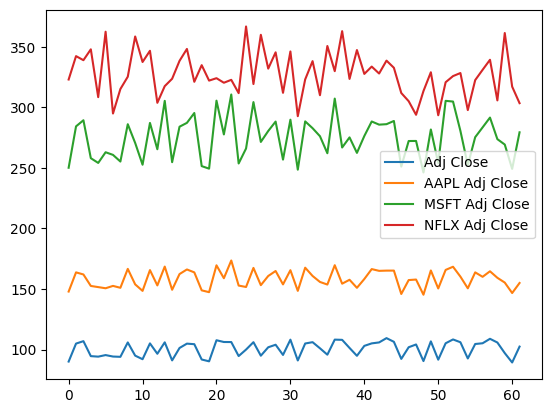

In [51]:
model_df[['Adj Close', 'AAPL Adj Close', 'MSFT Adj Close', 'NFLX Adj Close']].plot()

The above plot is all of the adjusted closes for each of the stocks, and illustrates that there is a correlation between the stocks and therefore we can use the data for the other stocks to have an impact on our model accuracy

In [52]:
import mplfinance

In [53]:
import matplotlib.pyplot as plt

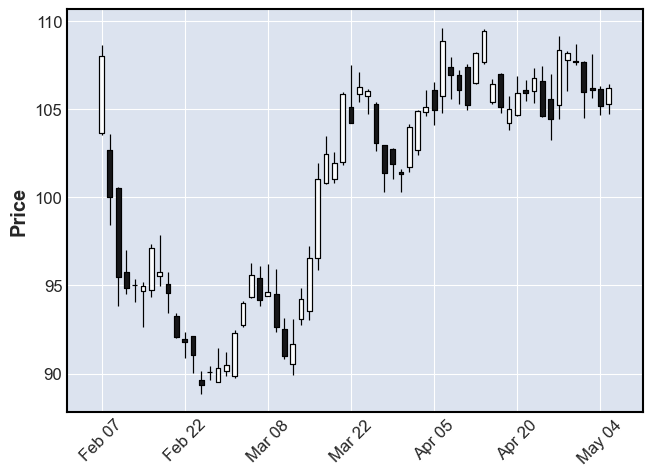

In [54]:
import matplotlib.dates as dates
o_df = model_df[['Date', 'Open', 'Close', 'High', 'Low']]
pd.to_datetime(o_df['Date'])
o_df.index = pd.DatetimeIndex(o_df['Date'])
mplfinance.plot(o_df.sort_index(), type='candle')

The above plot is used to illustrate the candlestick notation for Google stock and gives us overall information on how the open, high, low, volume are all influential upon the adjusted close of the stock.

<AxesSubplot:>

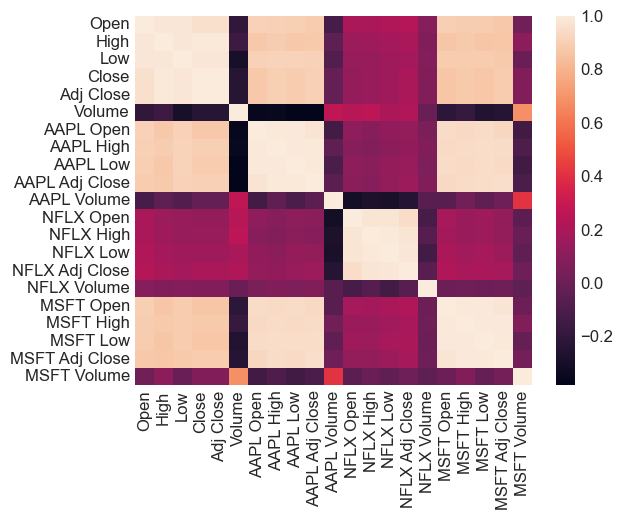

In [55]:
sns.heatmap(model_df.corr())

The above plot illustrates that there is a relatively strong correlation between the other companes Open, High, Low, Close, Adj Close and Googles. Therefore we can use this information in our model, to have other market factors influence our expected adjusted close price.

# Part 5

### 5.1 Picking an Algorithm

The algorithm or model that I will be using is the Long Short-Term Memory(LSTM). The LSTM model is based on the nueral-network model where the previous data is used to be remembered and improve the current model. The LSTM model is different from many other models in that it forgets data when instructed too, as a feedback network. It determines how effective the previous steps are, to prevent giving unnecessary information.

### 5.2 Model Training

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [57]:
model = Sequential()

In [58]:
scaler = MinMaxScaler(feature_range=(0,1))

In [59]:
trainX = np.array(X_train)

In [60]:
trainX = scaler.fit_transform(trainX)

In [61]:
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])

In [62]:
testX =np.array(X_test)

In [63]:
testX = scaler.fit_transform(testX)

In [64]:
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [65]:
valX = np.array(X_val)

In [66]:
valX = scaler.transform(valX)

In [67]:
X_val = valX.reshape(X_val.shape[0], 1, X_val.shape[1]) # adjust the ,1 to be 2nd or 3rd

In [68]:
model.add(LSTM(64, return_sequences=True, input_shape=(None, X_train.shape[2])))

In [69]:
model.add(LSTM(128, return_sequences=True))

In [70]:
model.add(LSTM(64, return_sequences=True))

In [71]:
model.add(Dense(1))

In [72]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
history = model.fit(X_train, y_train, epochs=1000, batch_size = 10, validation_data = (X_test, y_test))

Epoch 1/1000
5/5 [==============================] - 5s 227ms/step - loss: 10162.8252 - val_loss: 10449.6611
Epoch 2/1000
5/5 [==============================] - 0s 13ms/step - loss: 10154.0693 - val_loss: 10437.9600
Epoch 3/1000
5/5 [==============================] - 0s 12ms/step - loss: 10139.4590 - val_loss: 10416.5088
Epoch 4/1000
5/5 [==============================] - 0s 12ms/step - loss: 10112.4277 - val_loss: 10375.4512
Epoch 5/1000
5/5 [==============================] - 0s 13ms/step - loss: 10058.3730 - val_loss: 10295.9307
Epoch 6/1000
5/5 [==============================] - 0s 13ms/step - loss: 9956.7822 - val_loss: 10145.3730
Epoch 7/1000
5/5 [==============================] - 0s 14ms/step - loss: 9774.4619 - val_loss: 9887.8916
Epoch 8/1000
5/5 [==============================] - 0s 12ms/step - loss: 9475.6445 - val_loss: 9532.4111
Epoch 9/1000
5/5 [==============================] - 0s 13ms/step - loss: 9121.4424 - val_loss: 9148.5674
Epoch 10/1000
5/5 [========================

Text(0.5, 0, 'Epochs')

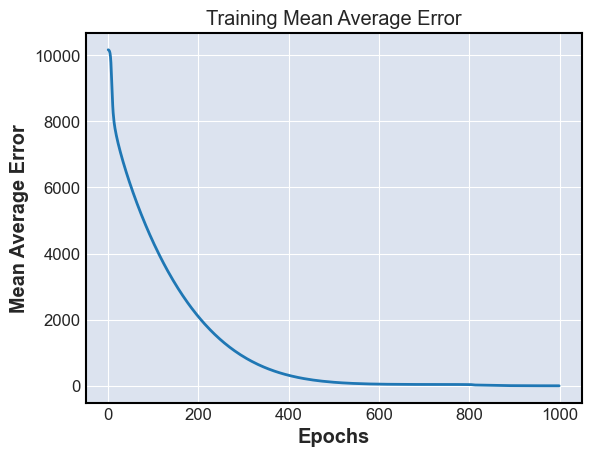

In [74]:
m_hist = pd.DataFrame(history.history)
m_hist['epoch'] = history.epoch
fig, ax = plt.subplots()
num_epochs = m_hist.shape[0]
ax.plot(np.arange(0, num_epochs), m_hist["loss"], 
        label="Training MAE")
ax.set_title('Training Mean Average Error')
ax.set_ylabel('Mean Average Error')
ax.set_xlabel('Epochs')

Text(0.5, 0, 'Epochs')

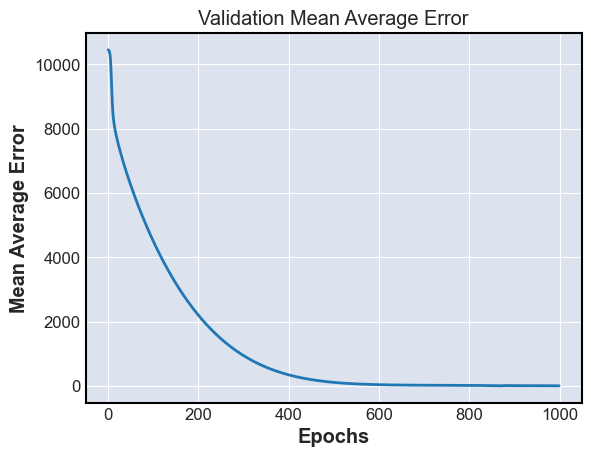

In [75]:
m_hist = pd.DataFrame(history.history)
m_hist['epoch'] = history.epoch
fig, ax = plt.subplots()
num_epochs = m_hist.shape[0]
ax.plot(np.arange(0, num_epochs), m_hist["val_loss"], 
        label="Validation MAE")
ax.set_title('Validation Mean Average Error')
ax.set_ylabel('Mean Average Error')
ax.set_xlabel('Epochs')

In [76]:
val_pred = model.predict(X_val)

1/1 [==============================] - 1s 1s/step


In [77]:
val_pred = pd.DataFrame(val_pred.reshape(-1,1))

In [78]:
val_pred.columns = ['Close']

In [79]:
validation_concat = pd.concat([val_pred, y_val.reset_index(drop=True)], axis=1)

In [80]:
validation_concat.rename(columns={'0':'Predicted', 'Adj Close':'Actual'}, inplace=True)
validation_concat

,Close,Actual
0,86.737778,94.250000
1,105.155235,106.120003
2,81.027771,92.660004
3,83.659607,91.800003
4,104.997437,106.260002
5,103.582397,102.459999


<AxesSubplot:>

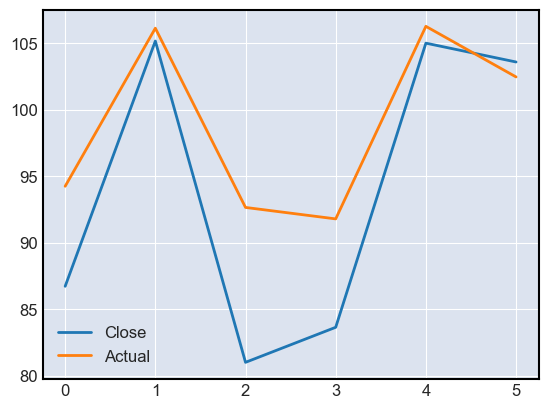

In [81]:
validation_concat.plot()

In [82]:
test_pred = model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


In [83]:
test_pred = pd.DataFrame(test_pred.reshape(-1,1))

In [84]:
test_pred.columns = ['Close']

In [85]:
test_concat = pd.concat([test_pred, y_test.reset_index(drop=True)], axis=1)
test_concat

,Close,Adj Close
0,105.369919,106.120003
1,89.485397,95.459999
2,103.964554,104.000000
3,94.270142,96.550003
4,103.758575,101.930000
5,104.861214,106.059998
6,104.901283,105.120003


<AxesSubplot:>

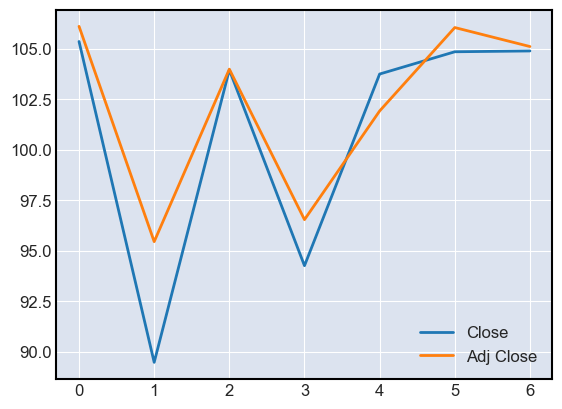

In [86]:
test_concat.plot()

### 5.3 Report Results

When exploring the market of the top tech stocks, Google, Microsoft, Netlix, Apple, we can determine the expected adjusted close of google and model the path of which it will go to predict the expected close. We can determine this data with a relatively decent certainty where our RNN model has a mean average error of about 2.5. I would like to have some more data to create a better more accurate model as its is only three months of data. I would also like to know and learn more about the LSTM models, and financial modelling in general.